## **Installing PyTorch Lightning**

Whether you use a local or hosted connection, be sure you install required packages.

In [1]:
!pip install pytorch-lightning --quiet

     |████████████████████████████████| 675kB 5.5MB/s 
     |████████████████████████████████| 829kB 29.7MB/s 
     |████████████████████████████████| 102kB 9.6MB/s 
     |████████████████████████████████| 276kB 32.9MB/s 


## **Introduction to Tensors**

A full guide to tensors can be found at https://pytorch.org/docs/stable/tensors.html


In [2]:
import torch
import numpy as np

### Creating Tensors

In [3]:
# Creating tensors from arrays
 
scalar = torch.tensor(4)
print("Tensor: {}\nShape: {}\nDimensions: {}\n".format(scalar.item(),scalar.shape, scalar.ndim))
 
vector = torch.tensor([3, 1])
print("Tensor: {}\nShape: {}\nDimensions: {}\n".format(vector,vector.shape, vector.ndim))
 
matrix = torch.tensor([[3, 1],[6, 3]])
print("Tensor: {}\nShape: {}\nDimensions: {}\n".format(matrix,matrix.shape, matrix.ndim))
 
tensor3 = torch.tensor([[[3, 1],[6, 3]],[[8, 2],[3, 7]]])
print("Tensor: {}\nShape: {}\nDimensions: {}\n".format(tensor3,tensor3.shape, tensor3.ndim))
 
list_array = tensor3.tolist()
print(list_array)

Tensor: 4
Shape: torch.Size([])
Dimensions: 0

Tensor: tensor([3, 1])
Shape: torch.Size([2])
Dimensions: 1

Tensor: tensor([[3, 1],
        [6, 3]])
Shape: torch.Size([2, 2])
Dimensions: 2

Tensor: tensor([[[3, 1],
         [6, 3]],

        [[8, 2],
         [3, 7]]])
Shape: torch.Size([2, 2, 2])
Dimensions: 3

[[[3, 1], [6, 3]], [[8, 2], [3, 7]]]


In [4]:
# Creating tensors with custom size
 
tensor = torch.zeros((3,4))
print(tensor)
 
tensor = torch.Tensor().new_full((3,4),10)
print(tensor)
 
tensor = torch.rand((3,4))
print(tensor)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[10., 10., 10., 10.],
        [10., 10., 10., 10.],
        [10., 10., 10., 10.]])
tensor([[0.4998, 0.9604, 0.5962, 0.2798],
        [0.3602, 0.5263, 0.1811, 0.1674],
        [0.1602, 0.4631, 0.2651, 0.5466]])


In [5]:
# Creating tensors from/to numpy
 
np_arr = np.random.rand(3,4)
print(np_arr)
print(type(np_arr),end='\n\n')
 
torch_arr = torch.from_numpy(np_arr)
print(torch_arr)
print(type(torch_arr),end='\n\n')
 
new_np_array = torch_arr.numpy()
print(new_np_array)
print(type(new_np_array))

[[0.49746819 0.85354365 0.83710449 0.94194322]
 [0.83041652 0.16504058 0.70782108 0.00980893]
 [0.62110855 0.48139535 0.91081027 0.23717787]]
<class 'numpy.ndarray'>

tensor([[0.4975, 0.8535, 0.8371, 0.9419],
        [0.8304, 0.1650, 0.7078, 0.0098],
        [0.6211, 0.4814, 0.9108, 0.2372]], dtype=torch.float64)
<class 'torch.Tensor'>

[[0.49746819 0.85354365 0.83710449 0.94194322]
 [0.83041652 0.16504058 0.70782108 0.00980893]
 [0.62110855 0.48139535 0.91081027 0.23717787]]
<class 'numpy.ndarray'>


### Devices and dtypes

In [6]:
# Data types
 
tensor = torch.zeros((3,4))
print(tensor.dtype)
 
tensor = torch.zeros((3,4),dtype=torch.float64)
print(tensor.dtype)
 
tensor = torch.zeros((3,4),dtype=torch.int)
print(tensor.dtype)
 
tensor = tensor.long()
print(tensor.dtype)

torch.float32
torch.float64
torch.int32
torch.int64


In [7]:
# Devices
 
device_cpu = torch.device('cpu')
device_gpu = torch.device('cuda:0')
 
tensor = torch.rand((3,4),dtype=torch.double, device=device_cpu)
print(tensor)
print(tensor.device)
 
tensor = tensor.to(device_gpu)
print(tensor)
print(tensor.device)
 
tensor = tensor.cpu()
print(tensor)
print(tensor.device)

tensor([[0.7201, 0.5932, 0.7688, 0.3049],
        [0.6170, 0.3917, 0.3638, 0.9276],
        [0.5908, 0.1598, 0.4324, 0.2768]], dtype=torch.float64)
cpu
tensor([[0.7201, 0.5932, 0.7688, 0.3049],
        [0.6170, 0.3917, 0.3638, 0.9276],
        [0.5908, 0.1598, 0.4324, 0.2768]], device='cuda:0',
       dtype=torch.float64)
cuda:0
tensor([[0.7201, 0.5932, 0.7688, 0.3049],
        [0.6170, 0.3917, 0.3638, 0.9276],
        [0.5908, 0.1598, 0.4324, 0.2768]], dtype=torch.float64)
cpu


### Operations

In [8]:
a = torch.tensor([[1, 2],[3, 4]])
b = torch.tensor([[5, 6],[7, 8]])
print("a=",a)
print("b=",b)
 
# sum
print("sum\n",a+b)
 
# hadamard product
print("\nhadamard product\n",a*b)
 
# matrix product
print("\nmatrix product\n",a.matmul(b))
 
# reduction sum
print("\nreduction sum\n",a.sum(),a.sum(0))
 
# dot product
a=a[0]
b=b[0]
print("\na=",a,"b=",b)
print("\ndot product\n",a.dot(b))

a= tensor([[1, 2],
        [3, 4]])
b= tensor([[5, 6],
        [7, 8]])
sum
 tensor([[ 6,  8],
        [10, 12]])

hadamard product
 tensor([[ 5, 12],
        [21, 32]])

matrix product
 tensor([[19, 22],
        [43, 50]])

reduction sum
 tensor(10) tensor([4, 6])

a= tensor([1, 2]) b= tensor([5, 6])

dot product
 tensor(17)


# Deep Learning with PyTorch Lightning

Basic components of a DL based solution:

*   Data
*   Model
*   Loss function
*   Optimizer



In [9]:
import pytorch_lightning as pl
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline

## Data

1.   Ready-to-use (https://pytorch.org/docs/stable/torchvision/datasets.html)
2.   Custom



Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!
Image



/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


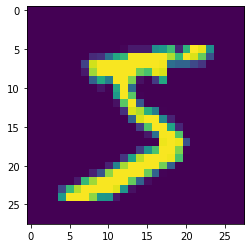

Label:  5


In [10]:
# Built-in datsets
import torchvision
 
dataset_mnist = torchvision.datasets.MNIST(root='./data', train=True, transform=torchvision.transforms.ToTensor(), download=True)
 
 
image, label = dataset_mnist[0]
 
print("Image")
plt.imshow(image.numpy()[0,:,:])
plt.show()
 
print("Label: ",label)

Image


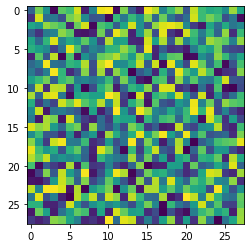

Label:  0


In [11]:
# Custom dataset
from torch.utils import data
 
class MyDataset(data.Dataset):
    def __init__(self, num_classes=10):
      self.num_classes=num_classes
 
    def __len__(self):
        return 10
 
    def __getitem__(self, index):
        sample = (np.random.rand(1,28,28), np.random.randint(self.num_classes))
        return sample
 
 
dataset = MyDataset(10)
image, label = dataset[0]
 
print("Image")
plt.imshow(image[0,:,:])
plt.show()
 
print("Label: ",label)

## Model

1.   Ready-to-use (https://pytorch.org/docs/stable/torchvision/models.html)
2.   Custom (https://prototypeml.com/)



In [12]:
# Built-in models
 
import torchvision
 
# model
net = torchvision.models.AlexNet(num_classes=10)
 
# image
image = torch.rand((1,3,224,224))
 
# forward
logit=net(image)
print(logit)
print(torch.nn.functional.softmax(logit,1))

tensor([[ 0.0001, -0.0176, -0.0045, -0.0020, -0.0009, -0.0269, -0.0010,  0.0115,
          0.0185, -0.0229]], grad_fn=<AddmmBackward>)
tensor([[0.1005, 0.0987, 0.1000, 0.1002, 0.1004, 0.0978, 0.1003, 0.1016, 0.1023,
         0.0982]], grad_fn=<SoftmaxBackward>)


In [13]:
# Custom model
 
# architecture
class LeNet5(torch.nn.Module):
    def __init__(self, num_classes = 10):
        super(LeNet5, self).__init__() 
 
        self.conv_1 = nn.Conv2d(
            in_channels = 1, 
            out_channels = 6, 
            kernel_size = 5, 
            bias = False)
        self.relu_1 = nn.ReLU(
            inplace = True)
        self.maxpool_1 = nn.MaxPool2d(
            kernel_size = 2, 
            stride = 2)
        self.conv_2 = nn.Conv2d(
            in_channels = 6, 
            out_channels = 16, 
            kernel_size = 5, 
            bias = False)
        self.relu_2 = nn.ReLU(
            inplace = True)
        self.maxpool_2 = nn.MaxPool2d(
            kernel_size = 2, 
            stride = 2)
        self.flatten = nn.Flatten()
        self.fc_1 = nn.Linear(
            in_features = 256, 
            out_features = 120, 
            bias = False)
        self.fc_2 = nn.Linear(
            in_features = 120, 
            out_features = 84)
        self.fc_3 = nn.Linear(
            in_features = 84, 
            out_features = num_classes)
 
    def forward(self, input):
        conv_1_output = self.conv_1(input)
        relu_1_output = self.relu_1(conv_1_output)
        maxpool_1_output = self.maxpool_1(relu_1_output)
        conv_2_output = self.conv_2(maxpool_1_output)
        relu_2_output = self.relu_2(conv_2_output)
        maxpool_2_output = self.maxpool_2(relu_2_output)
        flatten_output = self.flatten(maxpool_2_output)
        fc_1_output = self.fc_1(flatten_output)
        fc_2_output = self.fc_2(fc_1_output)
        fc_3_output = self.fc_3(fc_2_output)
        
        return fc_3_output
    
# model
net = LeNet5(num_classes=10)
 
# image
image = torch.rand((1,1,28,28))
 
# forward
logit=net(image)
print(logit)
print(torch.nn.functional.softmax(logit,1))

tensor([[-0.0682, -0.0637, -0.0024,  0.0350,  0.0412, -0.0595, -0.1310, -0.0366,
         -0.0529,  0.0532]], grad_fn=<AddmmBackward>)
tensor([[0.0960, 0.0964, 0.1025, 0.1064, 0.1071, 0.0968, 0.0901, 0.0990, 0.0974,
         0.1083]], grad_fn=<SoftmaxBackward>)


## Loss

1.   Ready-to-use (https://pytorch.org/docs/stable/nn.html#loss-functions)
2.   Custom (Mutator: https://prototypeml.com/)



In [14]:
# Built-in loss
 
# loss function
criterion = nn.MSELoss()
 
# image
image = torch.rand((1,1,28,28))
# label
target = torch.rand((1,10))
 
# forward
logit=net(image)
 
# loss value
loss = criterion(logit, target)
print(loss)

tensor(0.4250, grad_fn=<MseLossBackward>)


In [15]:
# Custom loss
 
# loss definition
class lossfunc(torch.nn.Module):
    def __init__(self):
        super(lossfunc, self).__init__() 
 
 
    def forward(self, input, target):
        mse_output = ((input-target)**2).mean(1)
        
        return mse_output
 
# loss function
criterion = lossfunc()
 
# loss value
loss = criterion(logit,target)
print(loss)

tensor([0.4250], grad_fn=<MeanBackward1>)


## Optimizer


1.   Ready-to-use (https://pytorch.org/docs/stable/optim.html#algorithms)
2.   Custom 



In [16]:
# Built-in optimizer
 
optimizer = torch.optim.SGD(net.parameters(),lr=1e-2)
 
# Custom
 
# ...... Inherit from torch.optim.Optimizer and implement step and zero_grad

## Trainer (PyTorch Lightning)

In [17]:
class LeNetPL(pl.LightningModule):
    def __init__(self,num_classes=10):
        super().__init__()
        self.lenet = LeNet5(num_classes)
        self.num_classes = num_classes
 
    def forward(self, input):
        return self.lenet(input.float())

    def loss_function(self, output, target):
        one_hot = nn.functional.one_hot(target.long(), self.num_classes).to(self.device)
        loss = nn.functional.binary_cross_entropy_with_logits(output,one_hot.float())

        return loss
 
    def training_step(self, batch, batch_ind):
        x, y = batch
        z = self.forward(x)
        loss = self.loss_function(z, y)
        return loss
 
    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3)
        return optimizer
 
net = LeNetPL()
 
trainer = pl.Trainer( gpus=1, max_epochs=10, progress_bar_refresh_rate=40)
trainer.fit(net,data.DataLoader(dataset_mnist, batch_size=40))


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type   | Params
---------------------------------
0 | lenet | LeNet5 | 44.3 K
---------------------------------
44.3 K    Trainable params
0         Non-trainable params
44.3 K    Total params


1

Classification,  2


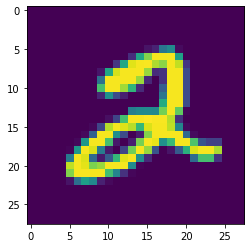

In [19]:
image, label = dataset_mnist[5]
plt.imshow(image[0])

logit = net(image.unsqueeze(0))
classification = nn.functional.softmax(logit,1).argmax().item()
print("Classification, ", classification)